# Important: F vs F --> Chi-Square Test 
- Chi-Square prints a p-values matrix (only takes categorical columns) that will be changed to True and False. If the p-value is less than 0.05, then there is a relationship, this is print TRUE (H0: null hypothesis). Otherwise, if p > 0.05 there is no relationship, this will print FALSE (Ha:  Alternative hypothesis)
- Goal is to print the count of the changes -->  from True to False OR from False to True
- Both data1 and data2 MUST have the same number of numerical and categorical columns. We will test 13 columns for all datasets with 8 'numerical'(at the beginning) and 5 'categorical' columns (at the end, including the label column)


In [1]:
import numpy as np
import pandas as pd
from numpy import linalg
from sklearn.model_selection import train_test_split
from itertools import combinations
from scipy import stats

# Upload Dataset

In [3]:
# Datasets before augmentation (synthetic)
data2 = pd.read_csv("/Users/fabianafazio/Documents/GitHub/BP24/Ellee/Data/Stacked/stacked_orig.csv", header=None)
data1 = pd.read_csv("/Users/fabianafazio/Documents/GitHub/BP24/Ellee/Data/Uniform/uniform_orig.csv", header=None)
#data1 = pd.read_csv("/Users/fabianafazio/Documents/GitHub/BP24/Ellee/Data/Gaussian/gaussian_orig.csv", header=None)


# Datasets after augmentation
#data2 = pd.read_csv("/Users/fabianafazio/Documents/GitHub/BP24/Ellee/Data/Stacked/stacked_new.csv", header=None)
#data2 = pd.read_csv("/Users/fabianafazio/Documents/GitHub/BP24/Fabiana/Data/HAT (synthetic datasets)/stacked_HAT.csv")
#data2 = pd.read_csv("/Users/fabianafazio/Documents/GitHub/BP24/Aug. Syn. Datasets/stacked_modpmone.csv")

#data2 = pd.read_csv("/Users/fabianafazio/Documents/GitHub/BP24/Ellee/Data/Uniform/uniform_new.csv", header=None)
#data2 = pd.read_csv("/Users/fabianafazio/Documents/GitHub/BP24/Fabiana/Data/HAT (synthetic datasets)/uniform_HAT.csv")
#data2 = pd.read_csv("/Users/fabianafazio/Documents/GitHub/BP24/Aug. Syn. Datasets/uniform_modpmone.csv")

#data2 = pd.read_csv("/Users/fabianafazio/Documents/GitHub/BP24/Ellee/Data/Gaussian/gaussian_new.csv", header=None)
#data2 = pd.read_csv("/Users/fabianafazio/Documents/GitHub/BP24/Fabiana/Data/HAT (synthetic datasets)/gaussian_HAT.csv")
#data2 = pd.read_csv("/Users/fabianafazio/Documents/GitHub/BP24/Aug. Syn. Datasets/gaussian_modpmone.csv")

In [ ]:
data1 = pd.read_csv("/Users/fabianafazio/Documents/GitHub/BP24/Ellee/Data/Uniform/uniform_orig.csv", header=None)
data2 = pd.read_csv("/Users/fabianafazio/Documents/GitHub/BP24/Ellee/Data/Uniform/uniform_new.csv", header=None)

In [ ]:
data1 = pd.read_csv("/Users/fabianafazio/Documents/GitHub/BP24/Ellee/Data/Stacked/stacked_orig.csv", header=None)
data2 = pd.read_csv("/Users/fabianafazio/Documents/GitHub/BP24/Ellee/Data/Stacked/stacked_new.csv", header=None)

In [ ]:
data1 = pd.read_csv("/Users/fabianafazio/Documents/GitHub/BP24/Ellee/Data/Gaussian/gaussian_orig.csv", header=None)
data2 = pd.read_csv("/Users/fabianafazio/Documents/GitHub/BP24/Ellee/Data/Gaussian/gaussian_new.csv", header=None)

In [ ]:
data1

# Shapes of Datasets
- They must be the same, if they are not--> run specific cells to make them have the same dimensions

In [ ]:
# Print shapes for debugging 
print(f"Shape of data1: {data1.shape}")
print(f"Shape of data2: {data2.shape}")


# Uniform Distribution

In [6]:
# Assuming data1 is your DataFrame
# indexes 2, 7, 10, 15, 24 are 'categorical' --> we will change this later on 
# Define the primary columns to move to the end
primary_indices = [2, 7, 10, 15, 24]
primary_columns = data1.columns[primary_indices]

# Define the initial columns (0 to 8), excluding the primary columns
initial_indices = list(range(13))
initial_indices = [i for i in initial_indices if i not in primary_indices]
initial_columns = data1.columns[initial_indices]

# Combine the initial columns with the primary columns
new_column_order = list(initial_columns) + list(primary_columns)

# Reorder the DataFrame
data1 = data1[new_column_order]

# Ensure the DataFrame has exactly 13 columns
data1 = data1.iloc[:, :13]

# Reset the column index to go from 0 to 12
data1.columns = range(13)

# Display the first few rows of the new DataFrame
print(data1.dtypes)


0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
dtype: object


In [ ]:
# Assuming data1 is your DataFrame
# indexes 2, 7, 10, 15, 24 are 'categorical' --> we will change this later on 
# Define the primary columns to move to the end
primary_indices = [2, 7, 10, 15, 24]
primary_columns = data2.columns[primary_indices]

# Define the initial columns (0 to 8), excluding the primary columns
initial_indices = list(range(13))
initial_indices = [i for i in initial_indices if i not in primary_indices]
initial_columns = data2.columns[initial_indices]

# Combine the initial columns with the primary columns
new_column_order = list(initial_columns) + list(primary_columns)

# Reorder the DataFrame
data2 = data2[new_column_order]

# Ensure the DataFrame has exactly 13 columns
data2 = data2.iloc[:, :13]

# Reset the column index to go from 0 to 12
data2.columns = range(13)

# Display the first few rows of the new DataFrame
print(data2.dtypes)


# Gaussian Distribution

In [ ]:
# indexes 2, 3, 7, 9, 12 are 'categorical' --> we will change this later on 
# Define the primary columns to move to the end
primary_indices = [2, 3, 7, 9, 12]
primary_columns = data1.columns[primary_indices]

# Define the initial columns (0 to 8), excluding the primary columns
initial_indices = list(range(13))
initial_indices = [i for i in initial_indices if i not in primary_indices]
initial_columns = data1.columns[initial_indices]

# Combine the initial columns with the primary columns
new_column_order = list(initial_columns) + list(primary_columns)

# Reorder the DataFrame
data1 = data1[new_column_order]

# Ensure the DataFrame has exactly 13 columns
data1 = data1.iloc[:, :13]

# Reset the column index to go from 0 to 12
data1.columns = range(13)

# Display the first few rows of the new DataFrame
print(data1.dtypes)


In [ ]:
# indexes 2, 3, 7, 9, 12 are 'categorical' --> we will change this later on 
# Define the primary columns to move to the end
primary_indices = [2, 3, 7, 9, 12]
primary_columns = data2.columns[primary_indices]

# Define the initial columns (0 to 8), excluding the primary columns
initial_indices = list(range(13))
initial_indices = [i for i in initial_indices if i not in primary_indices]
initial_columns = data2.columns[initial_indices]

# Combine the initial columns with the primary columns
new_column_order = list(initial_columns) + list(primary_columns)

# Reorder the DataFrame
data2 = data2[new_column_order]

# Ensure the DataFrame has exactly 13 columns
data2 = data2.iloc[:, :13]

# Reset the column index to go from 0 to 12
data2.columns = range(13)

# Display the first few rows of the new DataFrame
print(data2 .dtypes)


# Stacked Distribution

In [ ]:
# indexes 16, 17, 18, 19, 20, 21, 22, 23, 24 'categorical' --> we will change this later on 
# Define the primary columns to move to the end
primary_indices = [16, 17, 18, 19, 24]
primary_columns = data1.columns[primary_indices]

# Define the initial columns (0 to 8), excluding the primary columns
initial_indices = list(range(13))
initial_indices = [i for i in initial_indices if i not in primary_indices]
initial_columns = data1.columns[initial_indices]

# Combine the initial columns with the primary columns
new_column_order = list(initial_columns) + list(primary_columns)

# Reorder the DataFrame
data1 = data1[new_column_order]

# Ensure the DataFrame has exactly 13 columns
data1 = data1.iloc[:, :13]

# Reset the column index to go from 0 to 12
data1.columns = range(13)

# Display the first few rows of the new DataFrame
print(data1.dtypes)


In [8]:
# indexes 16, 17, 18, 19, 20, 21, 22, 23, 24 'categorical' --> we will change this later on 
# Define the primary columns to move to the end
primary_indices = [16, 17, 18, 19, 24]
primary_columns = data2.columns[primary_indices]

# Define the initial columns (0 to 8), excluding the primary columns
initial_indices = list(range(13))
initial_indices = [i for i in initial_indices if i not in primary_indices]
initial_columns = data2.columns[initial_indices]

# Combine the initial columns with the primary columns
new_column_order = list(initial_columns) + list(primary_columns)

# Reorder the DataFrame
data2 = data2[new_column_order]

# Ensure the DataFrame has exactly 13 columns
data2 = data2.iloc[:, :13]

# Reset the column index to go from 0 to 12
data2.columns = range(13)

# Display the first few rows of the new DataFrame
print(data2.dtypes)



0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
dtype: object


# Data1: Synthetic Data

In [ ]:
################### Convert 5 last columns to int then categorical ############
# Convert the last 5 columns to integers
#for col in data1.columns[-5:]:
#    data1[col] = data1[col].astype(int)

# Convert the last 5 columns to categorical
for col in data1.columns[-5:]:
    data1[col] = data1[col].astype('category')

print(data1.dtypes)
##################### Subsetting data ################################


# Splitting X_train into numerical subset 
numerical_df = data1.select_dtypes(include = ['float', 'float64'])

# Splitting X_train into categorical subset 
categorical_df = data1.select_dtypes(exclude=['float', 'float64'])


####################### Chi-Square (F vs F) Code ################################################
    
print("\n------------------Chi-Squared for Features v. Features-----------------------")
# Finds dependency between all CATEGORICAL features in X_train
def chi_squared_fvf(X_train_categorical):
        
    # Extract variable names
    variable_names = list(X_train_categorical.columns)

    # Initialize matrices to store chi-squared and p-values
    num_variables = len(variable_names)
    chi_squared = np.zeros((num_variables, num_variables))
    p_values = np.zeros((num_variables, num_variables))

    # Compute chi-squared and p-values for each pair of variables
    for i, j in combinations(range(num_variables), 2):
        contingency_table = pd.crosstab(X_train_categorical.iloc[:, i], X_train_categorical.iloc[:, j])
            
        # Compute chi-squared and p-values
        chi2 = stats.chi2_contingency(contingency_table)[0]
        p = stats.chi2_contingency(contingency_table)[1]
            
        # Assign results to chi_squared and p_values matrices
        chi_squared[i, j] = chi2
        chi_squared[j, i] = chi2  # Assign to symmetric position in the matrix
        p_values[i, j] = p
        p_values[j, i] = p  # Assign to symmetric position in the matrix

    # Create a DataFrame with variable names as index and columns
    chi_squared_df = pd.DataFrame(chi_squared, index=variable_names, columns=variable_names)
    p_values_df = pd.DataFrame(p_values, index=variable_names, columns=variable_names)

    # Printing the matrix-like output with variable names
    print("Chi-Squared Values:")
    print(chi_squared_df)
    print("\nP-Values:")
    print(p_values_df)

    return p_values_df
    
p_values_df = chi_squared_fvf(categorical_df)



#################### Change p_values_df to True and False Table #################################
# Create a new DataFrame with True/False based on the p_value condition
p_value_df1 = p_values_df < 0.05

# Display the new DataFrame
print(p_value_df1)


In [ ]:
################### Convert 5 last columns to int then categorical ############
# Convert the last 5 columns to integers
#for col in data1.columns[-5:]:
#    data1[col] = data1[col].astype(int)

# Convert the last 5 columns to categorical
for col in data2.columns[-5:]:
    data2[col] = data2[col].astype('category')

print(data2.dtypes)
##################### Subsetting data ################################


# Splitting X_train into numerical subset 
numerical_df = data2.select_dtypes(include = ['float', 'float64'])

# Splitting X_train into categorical subset 
categorical_df = data2.select_dtypes(exclude=['float', 'float64'])


####################### Chi-Square (F vs F) Code ################################################
    
print("\n------------------Chi-Squared for Features v. Features-----------------------")
# Finds dependency between all CATEGORICAL features in X_train
def chi_squared_fvf(X_train_categorical):
        
    # Extract variable names
    variable_names = list(X_train_categorical.columns)

    # Initialize matrices to store chi-squared and p-values
    num_variables = len(variable_names)
    chi_squared = np.zeros((num_variables, num_variables))
    p_values = np.zeros((num_variables, num_variables))

    # Compute chi-squared and p-values for each pair of variables
    for i, j in combinations(range(num_variables), 2):
        contingency_table = pd.crosstab(X_train_categorical.iloc[:, i], X_train_categorical.iloc[:, j])
            
        # Compute chi-squared and p-values
        chi2 = stats.chi2_contingency(contingency_table)[0]
        p = stats.chi2_contingency(contingency_table)[1]
            
        # Assign results to chi_squared and p_values matrices
        chi_squared[i, j] = chi2
        chi_squared[j, i] = chi2  # Assign to symmetric position in the matrix
        p_values[i, j] = p
        p_values[j, i] = p  # Assign to symmetric position in the matrix

    # Create a DataFrame with variable names as index and columns
    chi_squared_df = pd.DataFrame(chi_squared, index=variable_names, columns=variable_names)
    p_values_df = pd.DataFrame(p_values, index=variable_names, columns=variable_names)

    # Printing the matrix-like output with variable names
    print("Chi-Squared Values:")
    print(chi_squared_df)
    print("\nP-Values:")
    print(p_values_df)

    return p_values_df
    
p_values_df = chi_squared_fvf(categorical_df)



#################### Change p_values_df to True and False Table #################################
# Create a new DataFrame with True/False based on the p_value condition
p_value_df2 = p_values_df < 0.05

# Display the new DataFrame
print(p_value_df2)


# Data1 + Data2: Combined_data

In [ ]:
########################## Concat Data1 +  Data2 ##################################
# Combine the DataFrames using pd.concat to maintain the data types
combined_data = pd.concat([data1, data2], ignore_index=True)

 

################### Convert 5 last columns to int then categorical ############
# Convert the last 5 columns to integers
#for col in combined_data.columns[-5:]:
#    combined_data[col] = combined_data[col].astype(int)

# Convert the last 5 columns to categorical
for col in combined_data.columns[-5:]:
    combined_data[col] = combined_data[col].astype('category')

print(combined_data.dtypes)

##################### Subsetting data ################################


# Splitting X_train into numerical subset 
numerical_df = combined_data.select_dtypes(include = ['float', 'float64'])

# Splitting X_train into categorical subset 
categorical_df = combined_data.select_dtypes(exclude=['float', 'float64'])



####################### Chi-Square (F vs F) Code ################################################
    
print("\n------------------Chi-Squared for Features v. Features-----------------------")
# Finds dependency between all CATEGORICAL features in X_train
def chi_squared_fvf(X_train_categorical):
        
    # Extract variable names
    variable_names = list(X_train_categorical.columns)

    # Initialize matrices to store chi-squared and p-values
    num_variables = len(variable_names)
    chi_squared = np.zeros((num_variables, num_variables))
    p_values = np.zeros((num_variables, num_variables))

    # Compute chi-squared and p-values for each pair of variables
    for i, j in combinations(range(num_variables), 2):
        contingency_table = pd.crosstab(X_train_categorical.iloc[:, i], X_train_categorical.iloc[:, j])
            
        # Compute chi-squared and p-values
        chi2 = stats.chi2_contingency(contingency_table)[0]
        p = stats.chi2_contingency(contingency_table)[1]
            
        # Assign results to chi_squared and p_values matrices
        chi_squared[i, j] = chi2
        chi_squared[j, i] = chi2  # Assign to symmetric position in the matrix
        p_values[i, j] = p
        p_values[j, i] = p  # Assign to symmetric position in the matrix

    # Create a DataFrame with variable names as index and columns
    chi_squared_df = pd.DataFrame(chi_squared, index=variable_names, columns=variable_names)
    p_values_df = pd.DataFrame(p_values, index=variable_names, columns=variable_names)

    # Printing the matrix-like output with variable names
    print("Chi-Squared Values:")
    print(chi_squared_df)
    print("\nP-Values:")
    print(p_values_df)

    return p_values_df
    
p_values_df = chi_squared_fvf(categorical_df)

#################### Change p_values_df to True and False Table #################################
# Create a new DataFrame with True/False based on the p_value condition
p_value_df2 = p_values_df < 0.05

# Save the new DataFrame
#p_value_df1 = pd.DataFrame(p_value_df1, columns=['significant'])

# Display the new DataFrame
print(p_value_df2)


# Count of Changes in p-values

In [ ]:
# Count the changes between the two DataFrames
changes = (p_value_df1 != p_value_df2).sum().sum()

# Display the number of changes
print(f"Number of changes between p_value_df1 and p_value_df2: {changes}")

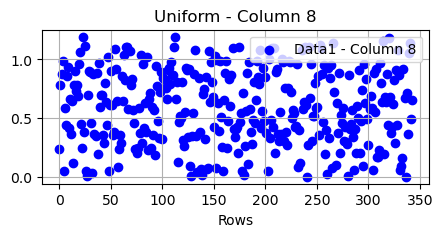

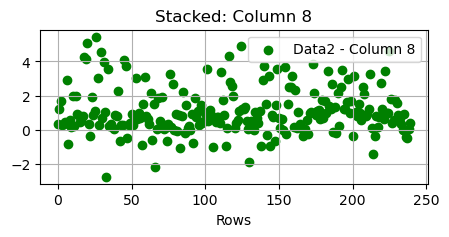

In [10]:
import matplotlib.pyplot as plt

#x_data1 = p_value_df1.index
#y_data1 = p_value_df1.iloc[:, 0]  # Column 8

x_data1 = data1.index
y_data1 = data1.iloc[:,7]


plt.figure(figsize=(5, 2))
plt.scatter(x_data1, y_data1, color='blue', label='Data1 - Column 8')
plt.xlabel('Rows')
plt.title('Uniform - Column 8')
plt.legend()
plt.grid(True)
plt.show()

#x_data2 = p_value_df2.index
#y_data2 = p_value_df2.iloc[:, 0]  

x_data2 = data2.index
y_data2 = data2.iloc[:,7]



plt.figure(figsize=(5, 2))
plt.scatter(x_data2, y_data2, color='green', label='Data2 - Column 8')
plt.xlabel('Rows')
plt.title('Stacked: Column 8')
plt.legend()
plt.grid(True)
plt.show()
